In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from pathlib import Path
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime as dt



In [2]:

#Read and load csv files 
file_path = Path("resources/dataset.csv")
df = pd.read_csv(file_path, sep = ',')
df.head(20)



,date,vendor_id,item_id,item_price,item_cnt_day
0,02.01.2013,59,22154,999.00,1.0
1,03.01.2013,25,2552,899.00,1.0
2,05.01.2013,25,2552,899.00,-1.0
3,06.01.2013,25,2554,1709.05,1.0
4,15.01.2013,25,2555,1099.00,1.0
5,10.01.2013,25,2564,349.00,1.0
6,02.01.2013,25,2565,549.00,1.0
7,04.01.2013,25,2572,239.00,1.0
8,11.01.2013,25,2572,299.00,1.0
9,03.01.2013,25,2573,299.00,3.0


In [3]:
# convert date to date format yyyy-mm-dd
df["date"] = pd.to_datetime(df['date'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 5 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   vendor_id     int64         
 2   item_id       int64         
 3   item_price    float64       
 4   item_cnt_day  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 112.0 MB


In [4]:
df["revenue"] = (df['item_price'] * df['item_cnt_day'])
df.head(20)

,date,vendor_id,item_id,item_price,item_cnt_day,revenue
0,2013-01-02,59,22154,999.00,1.0,999.00
1,2013-01-03,25,2552,899.00,1.0,899.00
2,2013-01-05,25,2552,899.00,-1.0,-899.00
3,2013-01-06,25,2554,1709.05,1.0,1709.05
4,2013-01-15,25,2555,1099.00,1.0,1099.00
5,2013-01-10,25,2564,349.00,1.0,349.00
6,2013-01-02,25,2565,549.00,1.0,549.00
7,2013-01-04,25,2572,239.00,1.0,239.00
8,2013-01-11,25,2572,299.00,1.0,299.00
9,2013-01-03,25,2573,299.00,3.0,897.00


In [5]:
#filter_vendor_id = (df["vendor_id"] == 25 | df["vendor_id"] == 31)
vendor25_31_df = df.loc[(df["vendor_id"] == 25) | (df["vendor_id"] == 31)]
vendor25_31_df

vendor25_31_df.describe()

,vendor_id,item_id,item_price,item_cnt_day,revenue
count,421740.000000,421740.000000,421740.000000,421740.000000,4.217400e+05
mean,28.352340,10981.925122,773.749202,1.310516,1.071033e+03
std,2.979241,6214.530320,1450.502815,2.346572,5.815128e+03
min,25.000000,18.000000,0.100000,-2.000000,-2.799000e+04
25%,25.000000,5380.000000,229.000000,1.000000,2.490000e+02
50%,31.000000,11068.000000,399.000000,1.000000,3.990000e+02
75%,31.000000,16175.000000,799.000000,1.000000,9.990000e+02
max,31.000000,22169.000000,50999.000000,501.000000,1.642100e+06


In [6]:
#Check for duplicates
vendor25_31_df.duplicated(subset=['vendor_id']).value_counts()

True     421738
False         2
dtype: int64

In [7]:
# Check for null values
vendor25_31_df.isna().sum()

date            0
vendor_id       0
item_id         0
item_price      0
item_cnt_day    0
revenue         0
dtype: int64

In [8]:
#check data types
vendor25_31_df.dtypes

date            datetime64[ns]
vendor_id                int64
item_id                  int64
item_price             float64
item_cnt_day           float64
revenue                float64
dtype: object

In [9]:
# Vendor_id frequency
vendor25_31_df['vendor_id'].value_counts()

31    235636
25    186104
Name: vendor_id, dtype: int64

In [10]:
#item_id frequency
vendor25_31_df.item_id.value_counts()

20949    1663
5822      973
17717     766
7894      683
2808      665
         ... 
15726       1
18565       1
21007       1
14694       1
20559       1
Name: item_id, Length: 16480, dtype: int64

In [11]:
# Check for item count for negative values
total_negative_values = 0

for value in vendor25_31_df['item_cnt_day']:
    if value < 0:
        total_negative_values += 1
print (f"Total negative item_cnt_day  {total_negative_values}")   

Total negative item_cnt_day  767


In [12]:
# check item price for values less than 1
total_less_than_1_values = 0

for value in vendor25_31_df['item_price']:
    if value < 0:
        total_less_than_1_values += 1
print (f"Total Less than 1  item_price  {total_less_than_1_values}")        


Total Less than 1  item_price  0


## Create Time Series Model for Vendor 25

In [13]:
# Select data for vendor 25
vendor25_df = df.loc[(df["vendor_id"] == 25)]
vendor25_df

,date,vendor_id,item_id,item_price,item_cnt_day,revenue
1,2013-01-03,25,2552,899.00,1.0,899.00
2,2013-01-05,25,2552,899.00,-1.0,-899.00
3,2013-01-06,25,2554,1709.05,1.0,1709.05
4,2013-01-15,25,2555,1099.00,1.0,1099.00
5,2013-01-10,25,2564,349.00,1.0,349.00
...,...,...,...,...,...,...
2935844,2015-10-10,25,7409,299.00,1.0,299.00
2935845,2015-10-09,25,7460,299.00,1.0,299.00
2935846,2015-10-14,25,7459,349.00,1.0,349.00
2935847,2015-10-22,25,7440,299.00,1.0,299.00


In [14]:
df_25 = pd.DataFrame({"date" : vendor25_df["date"],
                     "revenue": vendor25_df["revenue"]})
df_25.head()

,date,revenue
1,2013-01-03,899.00
2,2013-01-05,-899.00
3,2013-01-06,1709.05
4,2013-01-15,1099.00
5,2013-01-10,349.00


In [15]:
df_25 = df_25.set_index("date")
df_25.index

DatetimeIndex(['2013-01-03', '2013-01-05', '2013-01-06', '2013-01-15',
               '2013-01-10', '2013-01-02', '2013-01-04', '2013-01-11',
               '2013-01-03', '2013-01-03',
               ...
               '2015-10-24', '2015-10-31', '2015-10-11', '2015-10-10',
               '2015-10-09', '2015-10-10', '2015-10-09', '2015-10-14',
               '2015-10-22', '2015-10-03'],
              dtype='datetime64[ns]', name='date', length=186104, freq=None)

In [16]:
df_25 = df_25.revenue.resample('M').sum()
df_25

date
2013-01-31    5.376478e+06
2013-02-28    5.530463e+06
2013-03-31    6.655983e+06
2013-04-30    4.772728e+06
2013-05-31    4.171684e+06
2013-06-30    5.047670e+06
2013-07-31    3.959044e+06
2013-08-31    4.475531e+06
2013-09-30    7.937861e+06
2013-10-31    6.542260e+06
2013-11-30    8.248853e+06
2013-12-31    1.283458e+07
2014-01-31    5.126725e+06
2014-02-28    5.966910e+06
2014-03-31    6.395980e+06
2014-04-30    4.810962e+06
2014-05-31    5.248786e+06
2014-06-30    5.047889e+06
2014-07-31    4.356052e+06
2014-08-31    4.993276e+06
2014-09-30    6.783338e+06
2014-10-31    6.434201e+06
2014-11-30    9.408434e+06
2014-12-31    1.570787e+07
2015-01-31    6.498782e+06
2015-02-28    5.716941e+06
2015-03-31    6.080637e+06
2015-04-30    6.994908e+06
2015-05-31    6.898230e+06
2015-06-30    4.759046e+06
2015-07-31    4.354057e+06
2015-08-31    4.368532e+06
2015-09-30    7.341927e+06
2015-10-31    7.633958e+06
Freq: M, Name: revenue, dtype: float64

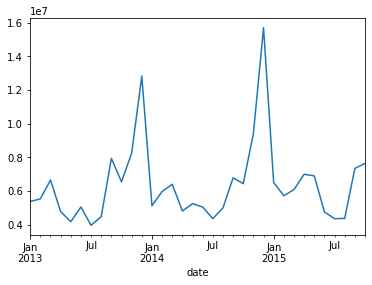

In [17]:
df_25.plot()

In [18]:
type(df_25)

pandas.core.series.Series

In [19]:
df_25.describe()

count    3.400000e+01
mean     6.367076e+06
std      2.413464e+06
min      3.959044e+06
25%      4.856540e+06
50%      5.841926e+06
75%      6.869507e+06
max      1.570787e+07
Name: revenue, dtype: float64

In [20]:
time_series = pd.DataFrame(df_25)
time_series

,revenue
date,
2013-01-31,5.376478e+06
2013-02-28,5.530463e+06
2013-03-31,6.655983e+06
2013-04-30,4.772728e+06
2013-05-31,4.171684e+06
2013-06-30,5.047670e+06
2013-07-31,3.959044e+06
2013-08-31,4.475531e+06
2013-09-30,7.937861e+06


## Stationary Test

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
stationary_test=adfuller(time_series['revenue'])

In [23]:
def adfuller_test(revenue):
    stationary_test=adfuller(revenue)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(stationary_test,labels):
        print(label+' : '+str(value) )

if stationary_test[1] <= 0.05:
    print("Reject the null hypothesis. Data is stationary")
else:
    print("Data is non-stationary ")

adfuller_test(time_series['revenue'])

Reject the null hypothesis. Data is stationary
ADF Test Statistic : -4.002470634257283
p-value : 0.001397629397457958
#Lags Used : 0
Number of Observations : 33


In [24]:
rev_diff = time_series - time_series.shift(1)

In [25]:
rev_diff["second_diff"] = rev_diff['revenue'] - rev_diff['revenue'].shift(1)

In [26]:
rev_diff

,revenue,second_diff
date,,
2013-01-31,NaN,NaN
2013-02-28,1.539851e+05,NaN
2013-03-31,1.125520e+06,9.715349e+05
2013-04-30,-1.883255e+06,-3.008775e+06
2013-05-31,-6.010444e+05,1.282211e+06
2013-06-30,8.759864e+05,1.477031e+06
2013-07-31,-1.088626e+06,-1.964612e+06
2013-08-31,5.164867e+05,1.605112e+06
2013-09-30,3.462330e+06,2.945843e+06


### Calculate mean square error

### Create Test and Train data

In [27]:
#create a training dataset

size = int(len(time_series) * 0.70)
df25_train = time_series[0:size]


In [28]:
df25_train.shape

(23, 1)

In [29]:
#Create a Test dataset 
df25_test = time_series[size:len(time_series)]

In [30]:
df25_test.shape

(11, 1)

### ARIMA Model

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

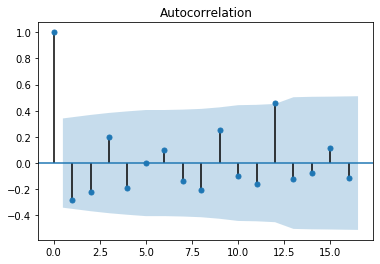

In [32]:
# plot acf to determine the value of the p parameter for the model 

first_diff = plot_acf(rev_diff['revenue'].dropna())

C:\Users\fmgri\anaconda3\envs\PythonData\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


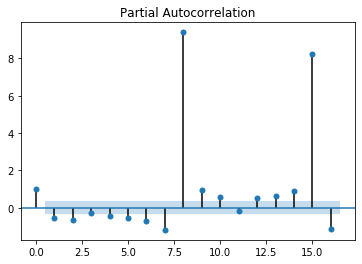

In [33]:
# plot pacf of the second revenue difference
sec_diff = plot_pacf(rev_diff['second_diff'].dropna())

In [34]:

from statsmodels.tsa.arima_model import ARIMA 
# MODEL parameters  p=1  d=0 q=1
revenue_model = ARIMA(df25_train, order=(1,0,1))

#fit MODEL

revenue_model_fit = revenue_model.fit()

revenue_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                revenue   No. Observations:                   23
Model:                     ARMA(1, 1)   Log Likelihood                -365.068
Method:                       css-mle   S.D. of innovations        1889313.172
Date:                Thu, 05 Aug 2021   AIC                            738.135
Time:                        19:33:49   BIC                            742.677
Sample:                    01-31-2013   HQIC                           739.277
                         - 11-30-2014                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.092e+06   5.65e+05     10.791      0.000    4.99e+06     7.2e+06
ar.L1.revenue     0.4344      0.485      0.896      0.370      -0.516       1.385
ma.L1.revenue    -0.1708      0.509     -0.335      0.737      -1.169       0.827
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3020           +0.0000j            2.3020            0.0000
MA.1            5.8559           +0.0000j            5.8559            0.0000
-----------------------------------------------------------------------------
"""

In [35]:
revenue_model_fit.resid

date
2013-01-31   -7.159431e+05
2013-02-28   -3.635633e+05
2013-03-31    7.457354e+05
2013-04-30   -1.437167e+06
2013-05-31   -1.592881e+06
2013-06-30   -4.823914e+05
2013-07-31   -1.761912e+06
2013-08-31   -9.910243e+05
2013-09-30    2.378585e+06
2013-10-31    5.436168e+04
2013-11-30    1.970304e+06
2013-12-31    6.141864e+06
2014-01-31   -2.845672e+06
2014-02-28   -1.919602e+05
2014-03-31    3.253005e+05
2014-04-30   -1.357775e+06
2014-05-31   -5.188308e+05
2014-06-30   -7.666548e+05
2014-07-31   -1.413542e+06
2014-08-31   -5.862501e+05
2014-09-30    1.068275e+06
2014-10-31    2.240712e+05
2014-11-30    3.205807e+06
Freq: M, dtype: float64

In [43]:
revenue_forecast = revenue_model_fit.forecast(steps=11)[0]
revenue_forecast

array([6985455.73525306, 6480357.50952804, 6260941.64624245,
       6165626.87654145, 6124221.91526329, 6106235.50220449,
       6098422.16185264, 6095028.02833339, 6093553.60870904,
       6092913.11733876, 6092634.88637341])

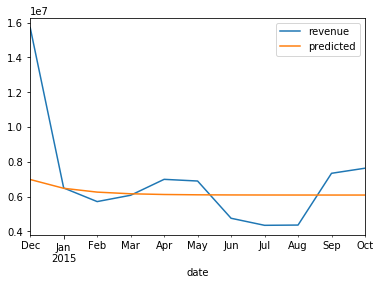

In [51]:
test_forecast = df25_test.copy()
test_forecast["predicted"] = revenue_forecast
test_forecast.plot()

## Evaluate the model 

In [58]:
from sklearn.metrics import mean_squared_error
df25_error = mean_squared_error(test_forecast["revenue"], test_forecast["predicted"])
np.sqrt(df_25_error)


2852520.579818862

## Forecast Dec 2015

In [101]:
# fit 1 month data
revenue_forecast = revenue_model_fit.forecast(steps=13)[0]
Dec2015_revenue = revenue_forecast

print(f"December 2015 Forecasted Revenue : {Dec2015_revenue[12]:,.2f}")

December 2015 Forecasted Revenue : 6,092,461.52


## Residual

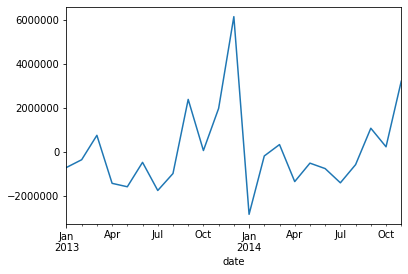

In [98]:
revenue_model_fit.resid.plot()

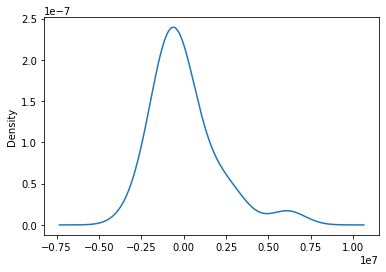

In [99]:
revenue_model_fit.resid.plot(kind='kde')